In [2]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.cluster import hierarchy 
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
crls = pd.read_csv("Cereals.csv")
crls.head(15)
crls.dtypes
crls.shape

(77, 14)

In [4]:
crls_new = crls.drop('name', axis = 1)
crls_new.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [5]:
impt_cols = ['carbo','sugars','potass']
for i in impt_cols:
    crls_new[i] = crls_new[i].fillna(crls_new[i].mean())
#post imputation
crls_new.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
crls_new.head(20)
crls_sc = pd.DataFrame(StandardScaler().fit_transform(crls_new),columns=crls_new.columns)
crls_sc.head(10)

calories   protein       fat    sodium     fiber     carbo    sugars  \
0 -1.905397  1.337319 -0.012988 -0.356306  3.314439 -2.542013 -0.237495   
1  0.677623  0.417912  3.987349 -1.737087 -0.064172 -1.764055  0.225316   
2 -1.905397  1.337319 -0.012988  1.204578  2.892113 -2.023374 -0.468901   
3 -2.938605  1.337319 -1.013072 -0.236238  5.003745 -1.764055 -1.625929   
4  0.161019 -0.501495  0.987096  0.484170 -0.486498 -0.208138  0.225316   
5  0.161019 -0.501495  0.987096  0.244034 -0.275335 -1.115756  0.688127   
6  0.161019 -0.501495 -1.013072 -0.416340 -0.486498 -0.986096  1.613750   
7  1.194228  0.417912  0.987096  0.604238 -0.064172  0.829140  0.225316   
8 -0.872189 -0.501495 -0.012988  0.484170  0.780481  0.051181 -0.237495   
9 -0.872189  0.417912 -1.013072  0.604238  1.202807 -0.467457 -0.468901   

     potass  vitamins     shelf    weight      cups    rating  
0  2.627053  -0.14627  0.957813 -0.198067 -2.123870  1.844202  
1  0.526376  -1.27255  0.957813 -0.198067  0.774053 -0.622110  
2  3.206550  -0.14627  0.957813 -0.198067 -2.123870  1.200922  
3  3.351425  -0.14627  0.957813 -0.198067 -1.388576  3.657211  
4  0.000000  -0.14627  0.957813 -0.198067 -0.307262 -0.593365  
5 -0.415306  -0.14627 -1.460273 -0.198067 -0.307262 -0.942704  
6 -0.994803  -0.14627 -0.251230 -0.198067  0.774053 -0.680121  
7  0.019317  -0.14627  0.957813  2.009342 -0.307262 -0.403213  
8  0.381502  -0.14627 -1.460273 -0.198067 -0.653283  0.462500  
9  1.323185  -0.14627  0.957813 -0.198067 -0.653283  0.762989

In [7]:
#Fit KMeans
km = KMeans(n_clusters=2,random_state=150)
km = km.fit(crls_sc)

km.predict(crls_sc)

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [8]:
crls["kmeans"] = km.predict(crls_sc)
crls.head(20)

name  calories  protein  fat  sodium  fiber  carbo  \
0                   100%_Bran        70        4    1     130   10.0    5.0   
1           100%_Natural_Bran       120        3    5      15    2.0    8.0   
2                    All-Bran        70        4    1     260    9.0    7.0   
3   All-Bran_with_Extra_Fiber        50        4    0     140   14.0    8.0   
4              Almond_Delight       110        2    2     200    1.0   14.0   
5     Apple_Cinnamon_Cheerios       110        2    2     180    1.5   10.5   
6                 Apple_Jacks       110        2    0     125    1.0   11.0   
7                     Basic_4       130        3    2     210    2.0   18.0   
8                   Bran_Chex        90        2    1     200    4.0   15.0   
9                 Bran_Flakes        90        3    0     210    5.0   13.0   
10               Cap'n'Crunch       120        1    2     220    0.0   12.0   
11                   Cheerios       110        6    2     290    2.0   17.0   
12      Cinnamon_Toast_Crunch       120        1    3     210    0.0   13.0   
13                   Clusters       110        3    2     140    2.0   13.0   
14                Cocoa_Puffs       110        1    1     180    0.0   12.0   
15                  Corn_Chex       110        2    0     280    0.0   22.0   
16                Corn_Flakes       100        2    0     290    1.0   21.0   
17                  Corn_Pops       110        1    0      90    1.0   13.0   
18              Count_Chocula       110        1    1     180    0.0   12.0   
19         Cracklin'_Oat_Bran       110        3    3     140    4.0   10.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  kmeans  
0      6.0   280.0        25      3    1.00  0.33  68.402973       0  
1      8.0   135.0         0      3    1.00  1.00  33.983679       0  
2      5.0   320.0        25      3    1.00  0.33  59.425505       0  
3      0.0   330.0        25      3    1.00  0.50  93.704912       0  
4      8.0     NaN        25      3    1.00  0.75  34.384843       1  
5     10.0    70.0        25      1    1.00  0.75  29.509541       1  
6     14.0    30.0        25      2    1.00  1.00  33.174094       1  
7      8.0   100.0        25      3    1.33  0.75  37.038562       0  
8      6.0   125.0        25      1    1.00  0.67  49.120253       1  
9      5.0   190.0        25      3    1.00  0.67  53.313813       0  
10    12.0    35.0        25      2    1.00  0.75  18.042851       1  
11     1.0   105.0        25      1    1.00  1.25  50.764999       1  
12     9.0    45.0        25      2    1.00  0.75  19.823573       1  
13     7.0   105.0        25      3    1.00  0.50  40.400208       0  
14    13.0    55.0        25      2    1.00  1.00  22.736446       1  
15     3.0    25.0        25      1    1.00  1.00  41.445019       1  
16     2.0    35.0        25      1    1.00  1.00  45.863324       1  
17    12.0    20.0        25      2    1.00  1.00  35.782791       1  
18    13.0    65.0        25      2    1.00  1.00  22.396513       1  
19     7.0   160.0        25      3    1.00  0.50  40.448772       0

In [9]:
#create and fit KMeans with range of k values
km_list = []
for clust in range(1,11):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(crls_sc)
    km_list.append(pd.Series({'clusters' : clust,'inertia' : km.inertia_,'model' : km}))

[Text(0, 0.5, 'Inertia'), Text(0.5, 0, 'Cluster')]

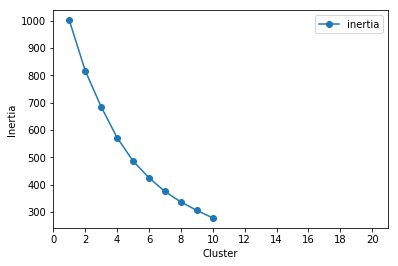

In [10]:
plot_data = pd.concat(km_list, axis = 1).T[['clusters','inertia']].set_index('clusters')
ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel = 'Cluster', ylabel = 'Inertia')

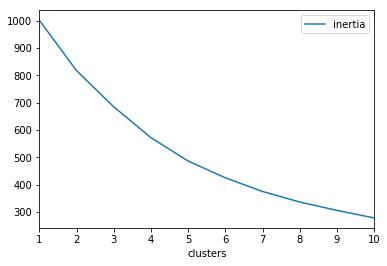

In [11]:
plot_data.plot()

In [12]:
#Agglomerative cluster
agg = AgglomerativeClustering(n_clusters=2,linkage='ward',compute_full_tree=True)
agg = agg.fit(crls_sc)
crls['Agg'] = agg.fit_predict(crls_sc)
crls.head(20)

name  calories  protein  fat  sodium  fiber  carbo  \
0                   100%_Bran        70        4    1     130   10.0    5.0   
1           100%_Natural_Bran       120        3    5      15    2.0    8.0   
2                    All-Bran        70        4    1     260    9.0    7.0   
3   All-Bran_with_Extra_Fiber        50        4    0     140   14.0    8.0   
4              Almond_Delight       110        2    2     200    1.0   14.0   
5     Apple_Cinnamon_Cheerios       110        2    2     180    1.5   10.5   
6                 Apple_Jacks       110        2    0     125    1.0   11.0   
7                     Basic_4       130        3    2     210    2.0   18.0   
8                   Bran_Chex        90        2    1     200    4.0   15.0   
9                 Bran_Flakes        90        3    0     210    5.0   13.0   
10               Cap'n'Crunch       120        1    2     220    0.0   12.0   
11                   Cheerios       110        6    2     290    2.0   17.0   
12      Cinnamon_Toast_Crunch       120        1    3     210    0.0   13.0   
13                   Clusters       110        3    2     140    2.0   13.0   
14                Cocoa_Puffs       110        1    1     180    0.0   12.0   
15                  Corn_Chex       110        2    0     280    0.0   22.0   
16                Corn_Flakes       100        2    0     290    1.0   21.0   
17                  Corn_Pops       110        1    0      90    1.0   13.0   
18              Count_Chocula       110        1    1     180    0.0   12.0   
19         Cracklin'_Oat_Bran       110        3    3     140    4.0   10.0   

    sugars  potass  vitamins  shelf  weight  cups     rating  kmeans  Agg  
0      6.0   280.0        25      3    1.00  0.33  68.402973       0    1  
1      8.0   135.0         0      3    1.00  1.00  33.983679       0    1  
2      5.0   320.0        25      3    1.00  0.33  59.425505       0    1  
3      0.0   330.0        25      3    1.00  0.50  93.704912       0    1  
4      8.0     NaN        25      3    1.00  0.75  34.384843       1    1  
5     10.0    70.0        25      1    1.00  0.75  29.509541       1    0  
6     14.0    30.0        25      2    1.00  1.00  33.174094       1    0  
7      8.0   100.0        25      3    1.33  0.75  37.038562       0    1  
8      6.0   125.0        25      1    1.00  0.67  49.120253       1    0  
9      5.0   190.0        25      3    1.00  0.67  53.313813       0    0  
10    12.0    35.0        25      2    1.00  0.75  18.042851       1    0  
11     1.0   105.0        25      1    1.00  1.25  50.764999       1    0  
12     9.0    45.0        25      2    1.00  0.75  19.823573       1    0  
13     7.0   105.0        25      3    1.00  0.50  40.400208       0    1  
14    13.0    55.0        25      2    1.00  1.00  22.736446       1    0  
15     3.0    25.0        25      1    1.00  1.00  41.445019       1    0  
16     2.0    35.0        25      1    1.00  1.00  45.863324       1    0  
17    12.0    20.0        25      2    1.00  1.00  35.782791       1    0  
18    13.0    65.0        25      2    1.00  1.00  22.396513       1    0  
19     7.0   160.0        25      3    1.00  0.50  40.448772       0    1

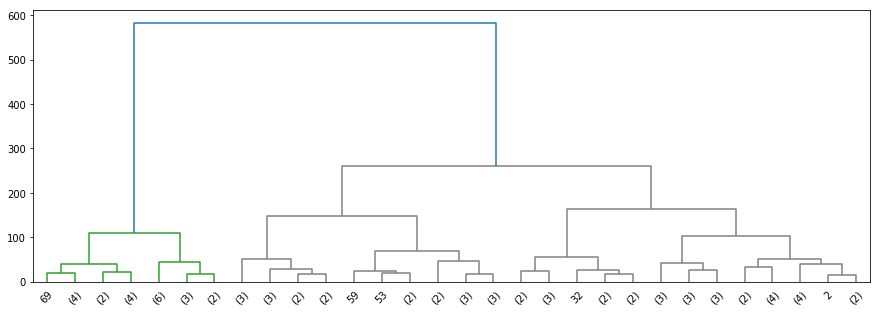

In [13]:
#Lets generate dendrogram for agg
Z = hierarchy.linkage(agg.children_, method='ward')
fig, ax = plt.subplots(figsize = (15,5))
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])
hierarchy.set_link_color_palette([red,'gray'])

#build a dendrogram
den = hierarchy.dendrogram(Z, orientation='top', p=30, 
                           truncate_mode='lastp',show_leaf_counts=True, ax=ax, above_threshold_color=blue)


In [14]:
#HW - build KMeans and Agg on wine_quality_data